<a href="https://colab.research.google.com/github/djeannie29/Primeiro-Modelo-de-IA-usando-Python-e-Scikit-learn/blob/main/Primeiro_Modelo_de_IA_usando_Python_e_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# As bibliotecas necessárias para este laboratório estão listadas abaixo. As bibliotecas pré-instaladas no Google Colab estão comentadas.
# Instalar pandas, matplotlib e scikit-learn nas versões especificadas
!pip install -qy pandas==1.3.4 matplotlib==3.5.0 scikit-learn==0.20.1
# Atualizar um pacote específico
!pip install pmdarima -U
# Atualizar um pacote para uma versão específica
!pip install --upgrade pmdarima==2.0.2

# Nota: Se o seu ambiente não suportar "!pip install", use "!mamba install"



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.2
    Uninstalling pmdarima-2.0.2:
      Successfully uninstalled pmdarima-2.0.2
  Using cached pmdarima-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.8 MB)
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4


In [2]:
#No Colab necessário forçar a instalação do matplotlib, scikit-learn e pandas
!pip install matplotlib==3.5.0
!pip install scikit-learn==0.20.1
!pip install pandas==1.3.4

  Using cached scikit-learn-0.20.1.tar.gz (9.7 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires matplotlib>=3.7

Instalando Bibliotecas

---



In [3]:
!pip install "tqdm == 4.60.0"
!pip install "seaborn == 0.9.0"
!pip install "skillsnetwork == 0.20.6"
!pip install "scikit-plot == 0.3.7"
!pip install "numpy == 1.19.5"

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


Importando Bibliotecas necessárias

---



In [16]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore', category=DeprecationWarning)
warn()


from tqdm import tqdm
import skillsnetwork
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scikitplot as skplt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

sns.set_context('notebook')
sns.set_style('white')

Exploração mínima dos dados para exemplo. O conjunto de dados contém informações sobre clientes de uma plataforma de negociação online para classificar se a probabilidade de cancelamento (churnrisk) de um determinado cliente será alta, média ou baixa.

Esse cálculo é feito da seguinte forma:
divide-se o número total de clientes que cancelaram pelo número total de clientes ativos no mesmo período. Por exemplo, se uma empresa teve 50 cancelamentos em um mês e está com 1.000 clientes ativos, a taxa de cancelamento (churnrisk) é de 5%. Churnrisk negativo ocorre quando o número de novos clientes excede o número de cancelamentos, o que é um sinal positivo para a empresa.

Carregando os dados

In [5]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX056YEN/churn.csv')
df_churn_pd = pd.read_csv('churn.csv')

df_churn_pd.head()

Saved as 'churn.csv'


,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


Execução de alguns códigos para verificar os tipos de dados que estamos trabalhando, verificando para isso os dados de cada coluna e também o número de entradas em cada uma dessas colunas.

In [6]:
print("O conjunto de dados contém colunas dos seguintes tipos de dados : \n" + str(df_churn_pd.dtypes))
#Existe uma discrepância na coluna de gênero que será tratada posteriormente

O conjunto de dados contém colunas dos seguintes tipos de dados : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


In [7]:
print("O conjunto de dados contém o seguinte número de registros para cada uma das colunas: \n" +str(df_churn_pd.count()))

O conjunto de dados contém o seguinte número de registros para cada uma das colunas: 
ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64


Criação de um gráfico de barras básico usando matplotlib para entender como os dados são divididos entre as diferentes classes de saída. Se não estivermos satisfeitos com os dados representativos, agora é o momento de obter mais dados para serem usados para treinamento e teste.

Cada categoria dentro da coluna “churnrisk” tem a seguinte contagem: : 
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


Text(0, 0.5, 'Frequency')

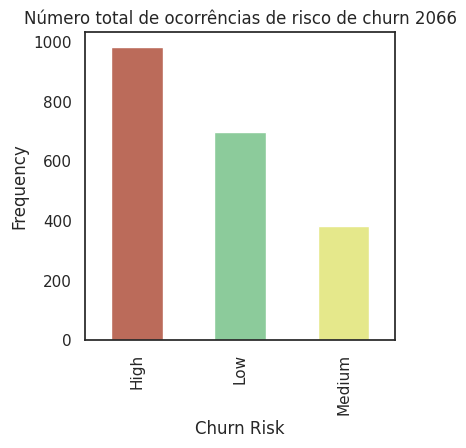

In [8]:
print("Cada categoria dentro da coluna “churnrisk” tem a seguinte contagem: : ")
print(df_churn_pd.groupby(['CHURNRISK']).size())
#bar chart to show split of data
index = ['High', 'Medium', 'Low']
churn_plot = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',
            figsize=(4,4), title="Número total de ocorrências de risco de churn "
            + str(df_churn_pd['CHURNRISK'].count()), color=['#BB6B5A', '#8CCB9B', '#E5E88B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

Pré- Processando os Dados


---

Etapa das mais importantes do processo, porque o modelo só terá um bom desempenho quando os dados em que é treinado são bons e bem preparados. A pqarte da construção desta etapa consome uma grande quantidade de tempo.

Existem várias etapas comuns de pré-processamento de dados que são realizadas em aprendizado de máquina. A lista completa das opções de pré-processamento fornecidas pelo scikit-learn estão disponíveis em: https://scikit-learn.org/stable/modules/preprocessing.html

Identificando colunas que não agregarão valor na previsão dos resultados. Enquanto algumas dessas colunas são facilmente identificadas, geralmente um especialista no assunto é contratado para identificar a maioria delas. Remover tais colunas ajuda a reduzir a dimensionalidade do modelo.

In [9]:
# removendo colunas não necessárias
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)
df_churn_pd.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


O Sklearn fornece uma biblioteca chamada ColumnTransformer, que permite a transformação individualizada para cada coluna para que uma sequência dessas técnicas seja aplicada a colunas seletivas usando um pipeline.

Lidando com dados ausentes:  O Scikit-learn fornece um método para preencher esses valores vazios com algo que seria aplicável em seu contexto. Usamos a classe SimpleImputer fornecida pelo Sklearn e preenchemos os valores ausentes com o valor mais frequente na coluna.

Além disso, como os algoritmos de aprendizado de máquina desempenham melhor com números do que com strings, queremos identificar colunas que têm categorias e convertê-las em números. Usamos a classe OneHotEncoder fornecida pelo Scikit-learn. A ideia do codificador one hot é criar variáveis binárias que representam cada categoria. Ao fazer isso, removemos qualquer relação ordinal que possa ocorrer apenas atribuindo números às categorias. Basicamente, passamos de uma única coluna que contém vários números de classe para várias colunas que contêm apenas números de classe binários.

In [61]:
# Definindo as colunas categoricas
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : ")
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")

onehot_categorical = OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute', impute_categorical), ('onehot', onehot_categorical)])

Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


*HOMEOWNER se refere ao status de propriedade residencial dos clientes. Ela indica se o cliente é proprietário de uma casa ou não, informação que pode ser relevante para prever o churn e entender o comportamento dos clientes em relação aos serviços oferecidos. *

As colunas numéricas do conjunto de dados são identificadas, e o StandardScaler é aplicado a cada uma das colunas. Desta forma, cada valor é subtraído pela média de sua coluna e dividido pelo seu desvio padrão.

In [62]:
# Corrigindo um erro de NameError ao definir o ColumnTransformer
# Adicionamos a definição das colunas numéricas antes de usá-las no ColumnTransformer, no Google Colab o código original não funciona.
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Definindo as colunas numéricas
numericalColumns = df_churn_pd.select_dtypes(include=['float64', 'int64']).columns

# Definindo o transformador para as colunas numéricas
numerical_transformer = StandardScaler()

# Definindo o transformador para as colunas categóricas
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categoricalColumns)
], remainder="passthrough")

# Definindo o transformador para todas as colunas
preprocessorForAllColumns = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categoricalColumns),
    ('num', numerical_transformer, numericalColumns)
], remainder="passthrough")

# Aplicando a transformação nas colunas categóricas
df_churn_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_churn_pd)

# Exibindo o resultado da transformação nas colunas categóricas
print("Data after transforming categorical columns:")
print(df_churn_pd_temp)

# Aplicando a transformação em todas as colunas
df_churn_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_churn_pd)
# Exibindo o resultado da transformação em todas as colunas
print("Data after transforming all columns:")
print(df_churn_pd_temp_2)


Data after transforming categorical columns:
[[1.0 0.0 0.0 ... 13 0.0 152.76525]
 [1.0 0.0 0.0 ... 10 1349.635 0.0]
 [1.0 0.0 0.0 ... 5 1123.6125 0.0]
 ...
 [1.0 0.0 0.0 ... 11 0.0 82.50825]
 [1.0 0.0 0.0 ... 5 930.093 0.0]
 [0.0 1.0 0.0 ... 8 1041.604 0.0]]
Data after transforming all columns:
[[1.0 0.0 0.0 ... -0.6792731303453047 -0.5106065181930338 'Medium']
 [1.0 0.0 0.0 ... 1.8354629319820521 -0.7959345330293706 'Low']
 [1.0 0.0 0.0 ... 1.4143217110983428 -0.7959345330293706 'Low']
 ...
 [1.0 0.0 0.0 ... -0.6792731303453047 -0.6418293606808149 'Medium']
 [1.0 0.0 0.0 ... 1.053742394902809 -0.7959345330293706 'Low']
 [0.0 1.0 0.0 ... 1.261517632686496 -0.7959345330293706 'Low']]


Os algoritmos de aprendizado de máquina não podem usar texto simples. Devemos converter os dados de texto para um número. Portanto, para cada string que é uma classe, atribuímos um rótulo que é um número. Por exemplo, no conjunto de dados de churn de clientes, o rótulo de saída CHURNRISK é classificado como alto, médio ou baixo e é atribuído os rótulos 0, 1 ou 2. Usamos a classe LabelEncoder fornecida pelo Sklearn para isso.

In [63]:
# Preparar o dataframe para dividir os dados em conjuntos de treino e teste.

features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(df_churn_pd, columns = ['CHURNRISK'])
label_encoder = LabelEncoder()
label = df_churn_pd['CHURNRISK']

label = label_encoder.fit_transform(label)
print("Encoded value of Churnrisk after applying label encoder : " + str(label))

Encoded value of Churnrisk after applying label encoder : [2 1 1 ... 2 1 1]


Esses são alguns dos passos de pré-processamento populares que são aplicados nos conjuntos de dados. Mais informações em detalhes sobre o pré-processamento de dados https://developer.ibm.com/articles/data-preprocessing-in-detail/

Aqui está a visualização 2D e 3D dos dados de Churnrisk.

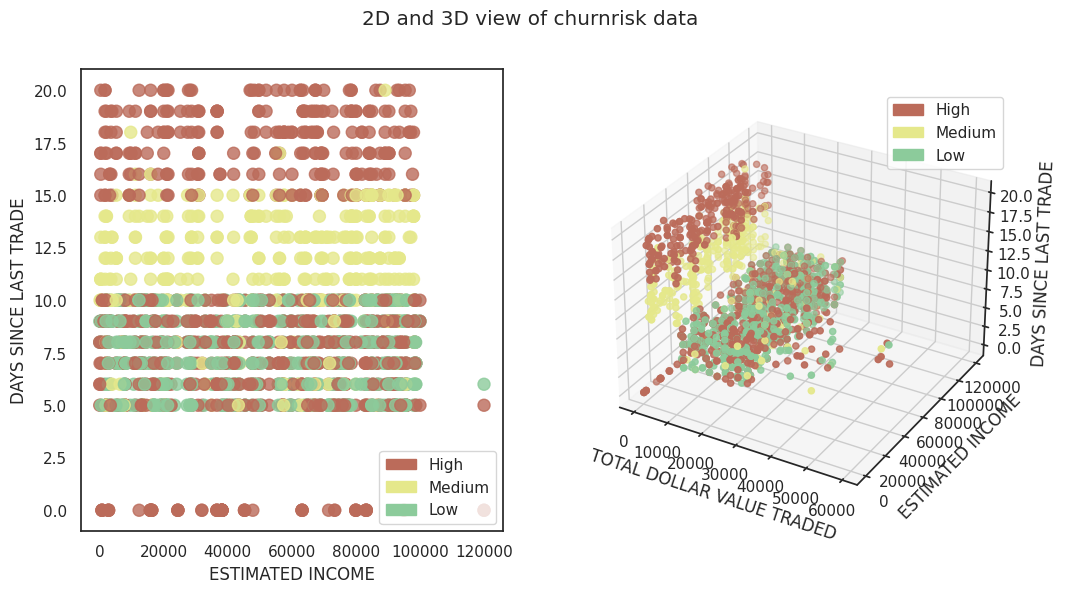

In [64]:
area = 75
x = df_churn_pd['ESTINCOME']
y = df_churn_pd['DAYSSINCELASTTRADE']
z = df_churn_pd['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()

Dividindo dados para treinamento e teste.
Após o pré-processamento dos dados, o próximo passo é dividir os dados em partes para serem usadas na criação e treinamento do modelo, bem como para testar e avaliar o modelo produzido. Existem várias teorias sobre qual porcentagem dos dados deve ser dividida entre treinamento e teste. Neste tutorial, estamos usando 98% dos dados para treinamento e 2% dos dados para teste. Essa divisão é importante para garantir que o modelo seja treinado com a maioria dos dados disponíveis, enquanto ainda reserva uma parte para avaliação imparcial do desempenho do modelo.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)
print("Dimensões dos conjuntos de dados que serão usados para treinamento : Características de entrada" + str(X_train.shape) + " Rótulo de saída" + str(y_train.shape))
print("Dimensões dos conjuntos de dados que serão usados para teste : Características de entrada" + str(X_test.shape) + " Rótulo de saída" + str(y_test.shape))


Dimensões dos conjuntos de dados que serão usados para treinamento : Características de entrada(1549, 15) Rótulo de saída(1549,)
Dimensões dos conjuntos de dados que serão usados para teste : Características de entrada(517, 15) Rótulo de saída(517,)



Preparando um modelo de classificação Existem vários modelos de classificação populares que se comprovaram com alta precisão. Neste tutorial, aplicamos o classificador de florestas aleatórias inicializando a biblioteca fornecida pelo Sklearn. Como parte deste caminho de aprendizado, fizemos uma descrição detalhada e comparação dos vários modelos de classificação em Aprenda algoritmos de classificação usando Python e scikit-learn. Por enquanto, vamos pular os detalhes de como a floresta aleatória funciona e continuar com a criação do nosso primeiro modelo de aprendizado de máquina.


In [66]:
model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

**Usando pipeline **

---


Pipelines são uma maneira conveniente de projetar o processamento de dados em um fluxo de aprendizado de máquina. A ideia por trás do uso de pipelines é explicada em detalhes em Aprenda algoritmos de classificação usando Python e scikit-learn. O exemplo de código a seguir mostra como os pipelines são configurados usando o sklearn.
https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

In [67]:
rfc_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('classifier', randomForestClassifier)])

**Treinando o Modelo**

---
O passo final na criação do modelo é chamado de modelagem, onde você basicamente treina seu algoritmo de aprendizado de máquina. Os 98% dos dados que foram divididos na etapa de divisão de dados são usados para treinar o modelo que foi inicializado na etapa anterior.


In [68]:
# Criando modelo
rfc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'STATUS',
                                                   'HOMEOWNER']),
                                                 ('num', StandardScaler(),
                                                  Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=2, random_state=0))])

**Executando previsões no modelo**

---

Após o modelo ser treinado, ele está pronto para algumas análises. Nesta etapa, os 2% dos dados que foram reservados para testar o modelo são usados para executar previsões. Os dados são apresentados sem quaisquer resultados e são passados como mostrado na imagem a seguir. A saída prevista é coletada para avaliação contra os resultados reais, e é isso que faremos na próxima etapa.

In [69]:
y_pred_rfc = rfc_model.predict(X_test)

**Avaliando e visualizando o desempenho do modelo**

---

 Os resultados das previsões obtidos na etapa anterior são comparados com o que os resultados reais deveriam ter sido. Várias métricas de avaliação são geradas para calcular o desempenho do modelo.

Em um problema de classificação supervisionada, como a classificação de risco de churn, temos um resultado verdadeiro e um resultado previsto gerado pelo modelo para cada ponto de dados. Por essa razão, os resultados para cada ponto de dados podem ser atribuídos a uma das quatro categorias:

Verdadeiro Positivo (VP) - o rótulo é positivo e a previsão também é positiva
Verdadeiro Negativo (VN) - o rótulo é negativo e a previsão também é negativa
Falso Positivo (FP) - o rótulo é negativo, mas a previsão é positiva
Falso Negativo (FN) - o rótulo é positivo, mas a previsão é negativa
Esses quatro números são os blocos de construção para a maioria das métricas de avaliação de classificadores. Um ponto fundamental ao considerar a avaliação de classificadores é que a precisão pura (ou seja, se a previsão estava correta ou incorreta) geralmente não é uma boa métrica. A razão para isso é porque um conjunto de dados pode ser altamente desequilibrado. Por exemplo, se um modelo é projetado para prever fraude a partir de um conjunto de dados onde 95% dos pontos de dados não são fraude e 5% dos pontos de dados são fraude, então um classificador ingênuo que prevê não fraude, independentemente da entrada, será 95% preciso. Por essa razão, métricas como precisão e revocação são tipicamente usadas porque levam em conta o tipo de erro. Na maioria das aplicações, há algum equilíbrio desejado entre precisão e revocação, que pode ser capturado combinando os dois em uma única métrica, chamada de medida F.

**Métodos Auxiliares para Geração de Gráficos**

---

A seguir, definimos algumas funções de ajuda para visualizar os resultados.

In [78]:
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('DADOS REAIS VS. PREVISÕES: ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()

x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='ALTO')
pop_b = mpatches.Patch(color='#E5E88B', label='MÉDIO')
pop_c = mpatches.Patch(color='#8CCB9B', label='BAIXO')

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Dados Reais vs. Previsões (3D) : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('Valor Total Negociado em Dólar')
    ax.set_ylabel('RENDA ESTIMADA')
    ax.set_zlabel('DIAS DESDE A ÚLTIMA TRANSAÇÃO')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('DADOS REAIS ')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('Valor Total Negociado em Dólar')
    ax.set_ylabel('RENDA ESTIMADA')
    ax.set_zlabel('DIAS DESDE A ÚLTIMA TRANSAÇÃO')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('PREVISÕES')

    plt.show()


def model_metrics(y_test,y_pred):
    print("Valores Decodificados de Churnrisk Após Aplicar o Inverso do Label Encoder : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()

    print("The classification report for the model : \n\n"+ classification_report(y_test, y_pred))

2D and 3D visualization of results

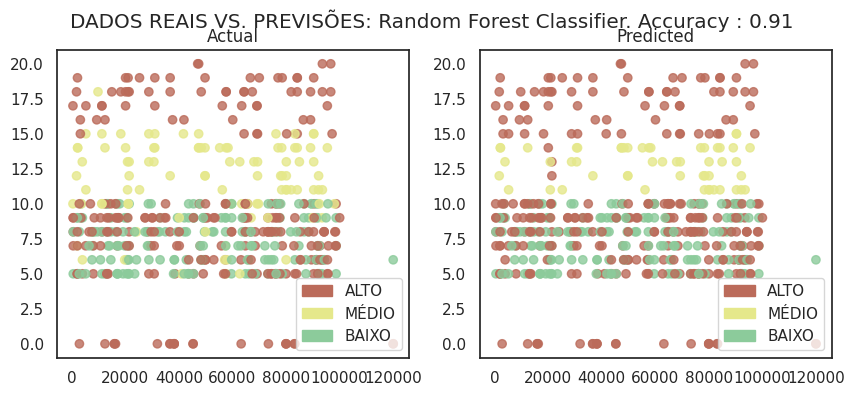

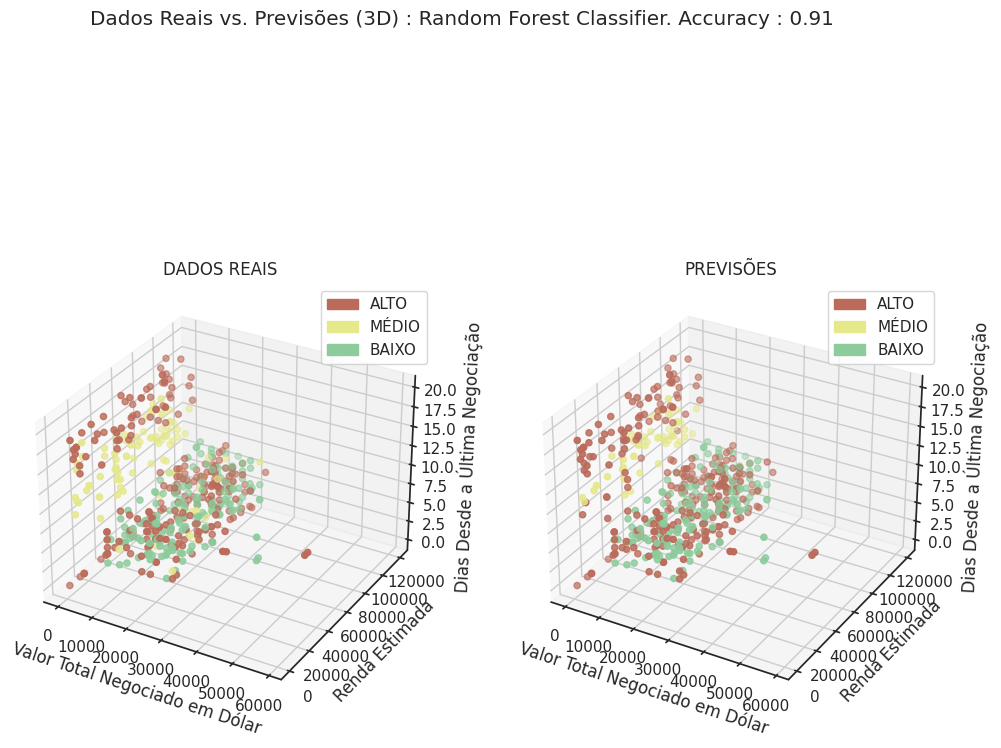

In [79]:
two_d_compare(y_test, y_pred_rfc, model_name)

three_d_compare(y_test,y_pred_rfc,model_name)

**Confusion matrix**

---

No gráfico abaixo, imprimimos uma matriz de confusão e um relatório de classificação autoexplicativo.

A matriz de confusão mostra que **42** médios foram erroneamente previstos como altos, **2** médios foram erroneamente previstos como baixos e **52** médios foram corretamente previstos como médios.

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


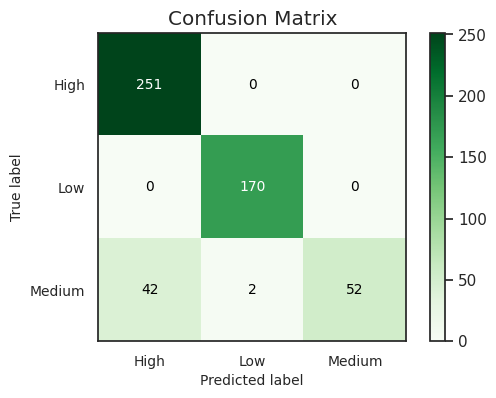

The classification report for the model : 

              precision    recall  f1-score   support

        High       0.86      1.00      0.92       251
         Low       0.99      1.00      0.99       170
      Medium       1.00      0.54      0.70        96

    accuracy                           0.91       517
   macro avg       0.95      0.85      0.87       517
weighted avg       0.93      0.91      0.91       517



In [58]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_rfc = label_encoder.inverse_transform(y_pred_rfc)
model_metrics(y_test, y_pred_rfc)

**Comparative study**

---

No gráfico de barras abaixo, comparamos as classes de saída do algoritmo de classificação de florestas aleatórias com os valores reais.

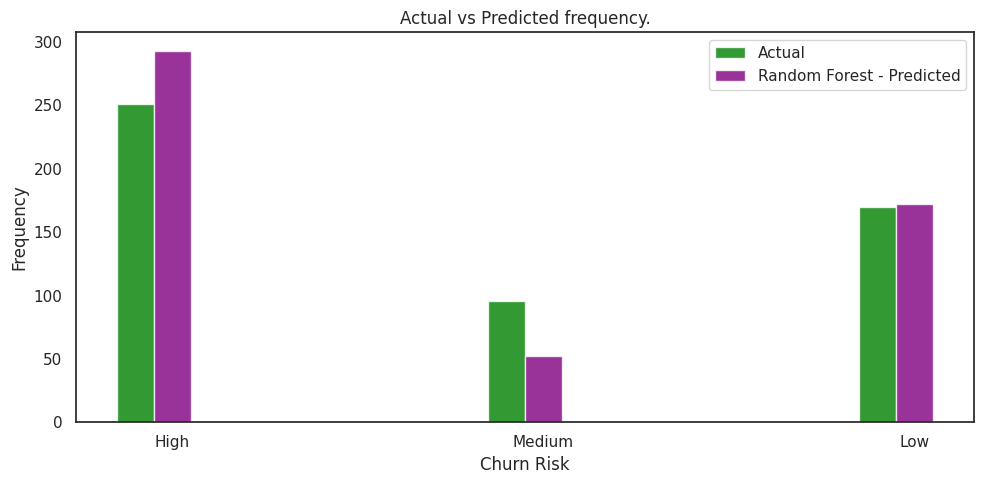

In [80]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects6 = plt.bar(index + bar_width, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()

Summary¶
Until evaluation provides satisfactory scores, you would repeat the data preprocessing through evaluating steps by tuning what are called the hyperparameters.

In this tutorial, you got a hands-on example of how to develop a basic machine learning classification model from start to finish.

**Exercises**


Exercício 1 - Tentar novos parametros

Altere os valores dos parâmetros no classificador Random Forest.


In [82]:
randomForestClassifier = RandomForestClassifier(n_estimators=70, max_depth=1, random_state=1)

Exercício 2 - Mudando para usar outros modelos
Aplique diferentes algoritmos de classificação (como Regressão Logística, Máquina de Vetores de Suporte, K-Vizinhos Mais Próximos) ao mesmo conjunto de dados usado em aula.



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_name_logistic = "Logistic Regression"
logistic_model = LogisticRegression()

In [ ]:
model_name_svc = "Support Vector Machine"
svc_model = SVC()

In [ ]:
model_name_knn = "K-Nearest Neighbors"
knn_model = KNeighborsClassifier(n_neighbors=5)

Exercício 3 - Visualização de Dados

Você pode usar algumas outras tecnologias para visualizar o conjunto de dados?


Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


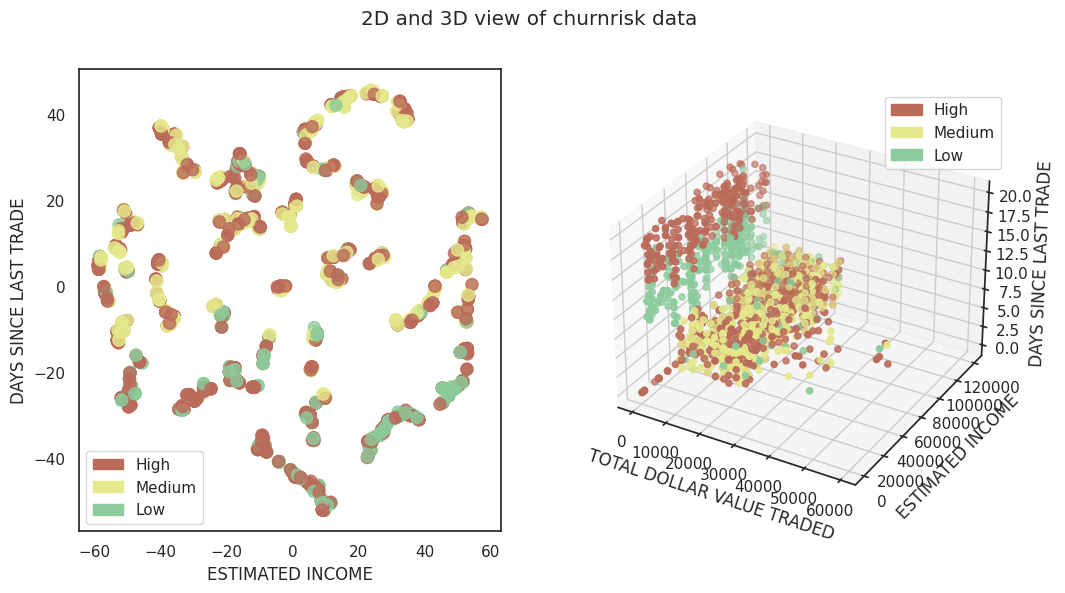

In [95]:
from sklearn.manifold import TSNE


# Defining the categorical columns
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : ")
print(categoricalColumns)

# Selecting only the categorical columns
df_categorical = df_churn_pd[categoricalColumns]

# Creating a Pipeline for categorical transformation
impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical = OneHotEncoder(handle_unknown='ignore')
categorical_transformer = Pipeline(steps=[('impute', impute_categorical), ('onehot', onehot_categorical)])

# Applying the transformation to categorical columns
categorical_features_transformed = categorical_transformer.fit_transform(df_categorical)


# Combining transformed categorical columns with the remaining columns
features_transformed = categorical_features_transformed.toarray()
if len(df_churn_pd.columns) > len(categoricalColumns):
    other_columns = df_churn_pd.drop(columns=categoricalColumns)
    other_columns_array = other_columns.select_dtypes(include=[np.number]).values
    features_transformed = np.hstack((categorical_features_transformed.toarray(), other_columns_array))

# Reducing dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(features_transformed)

# Adding colors
label = df_churn_pd['CHURNRISK']
color_mapping = {'High': '#BB6B5A', 'Medium': '#8CCB9B', 'Low': '#E5E88B'}
colors = [color_mapping.get(l, '#FFFFFF') for l in label]

# Creating the plot
fig = plt.figure(figsize=(12, 6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2, 1)
ax.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.8, c=colors, s=75)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')
plt.legend(handles=[pop_a, pop_b, pop_c])

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(df_churn_pd['TOTALDOLLARVALUETRADED'], df_churn_pd['ESTINCOME'], df_churn_pd['DAYSSINCELASTTRADE'], c=colors, marker='o')
ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')
plt.legend(handles=[pop_a, pop_b, pop_c])

plt.show()

